In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
from statistics import mean
from scipy.stats import uniform
import seaborn as sns
%matplotlib inline

from src.model04 import Schelling
import src.plots as plots

Now we instantiate a model instance: a 20x20 grid, with an 80% chance of an agent being placed in each cell, and the income distribution is skewed to the right (There are 4 types of income distribution available: 'right' , 'left' , 'normal' , 'uniform'. For more information and visualisation of the distributions, scroll to the end of this document)

In [8]:
model_height=20
model_width=20
density=0.8
income_distribution_type='right'

model = Schelling(model_height, model_width, density, income_distribution_type)

0


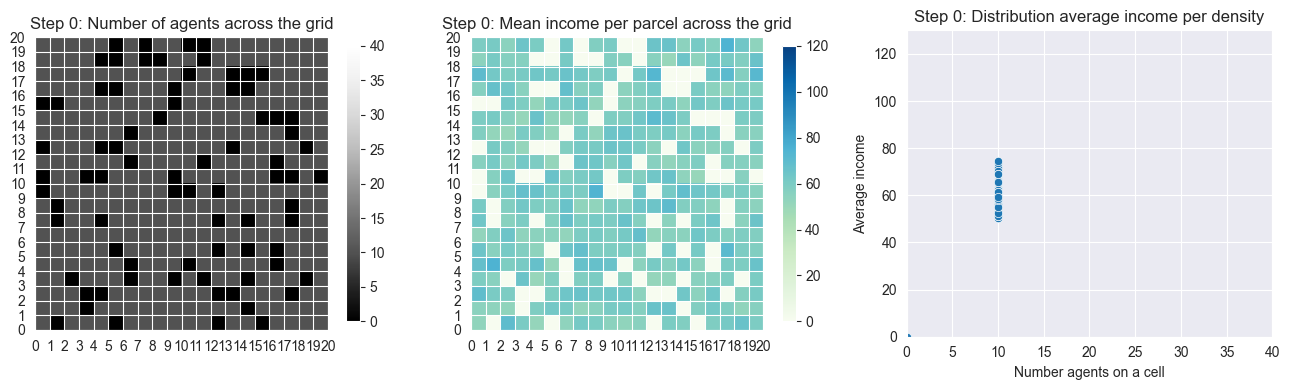

1


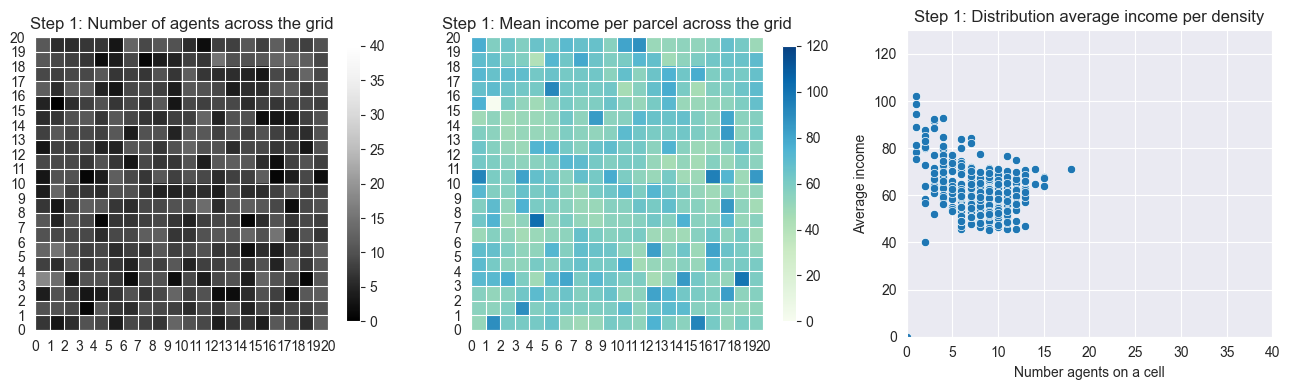

2


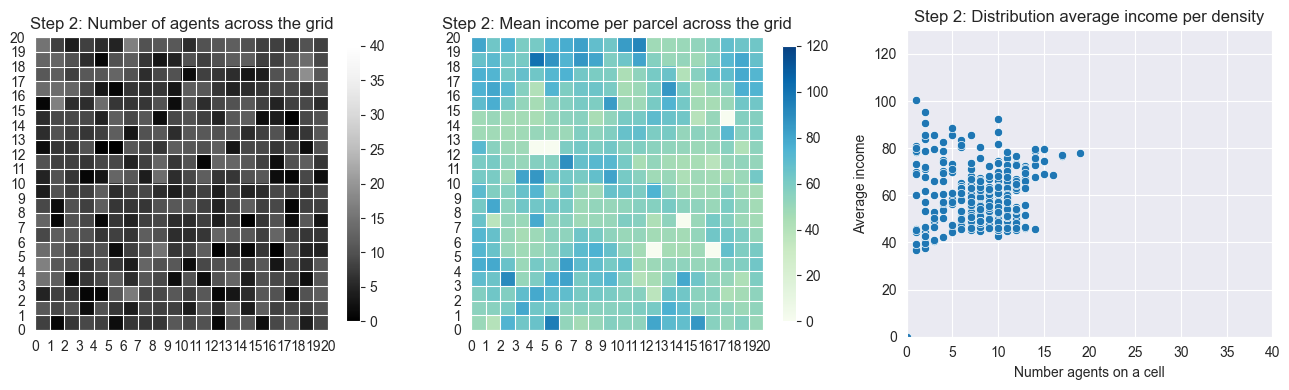

3


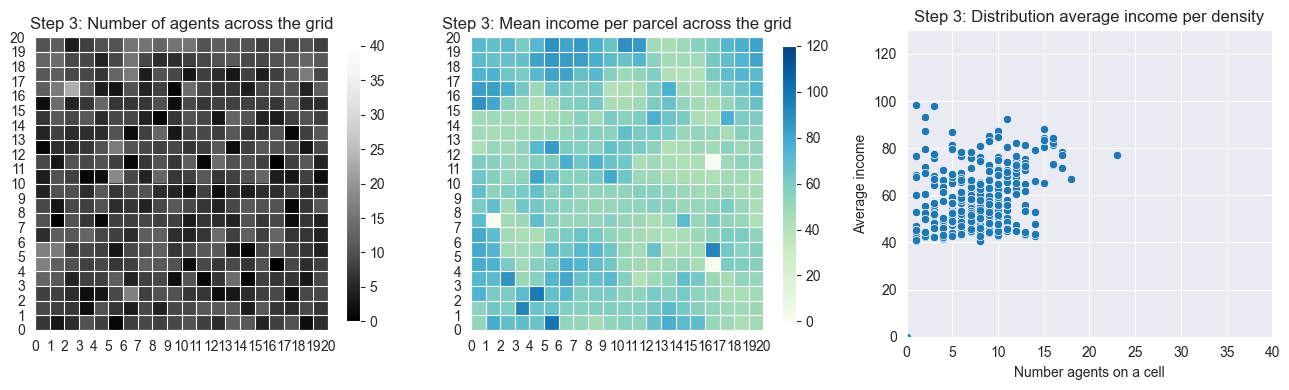

4


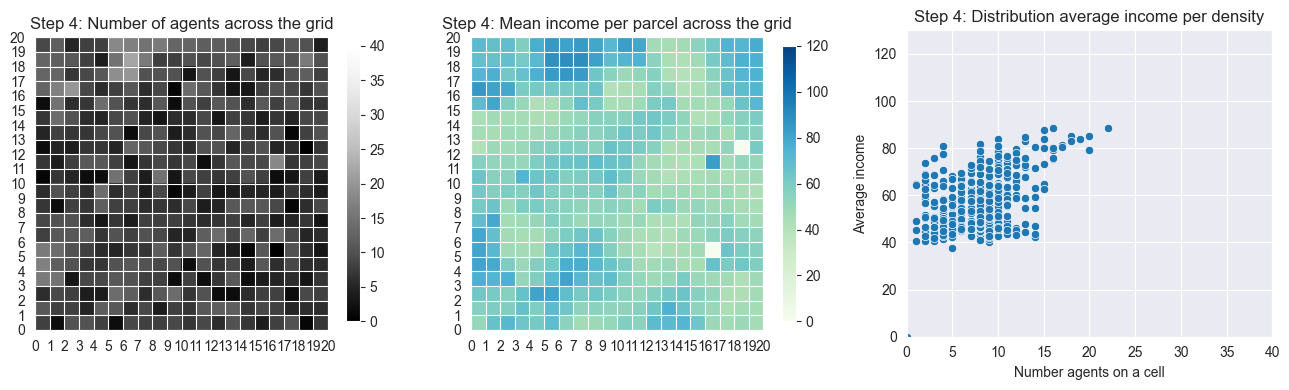

5


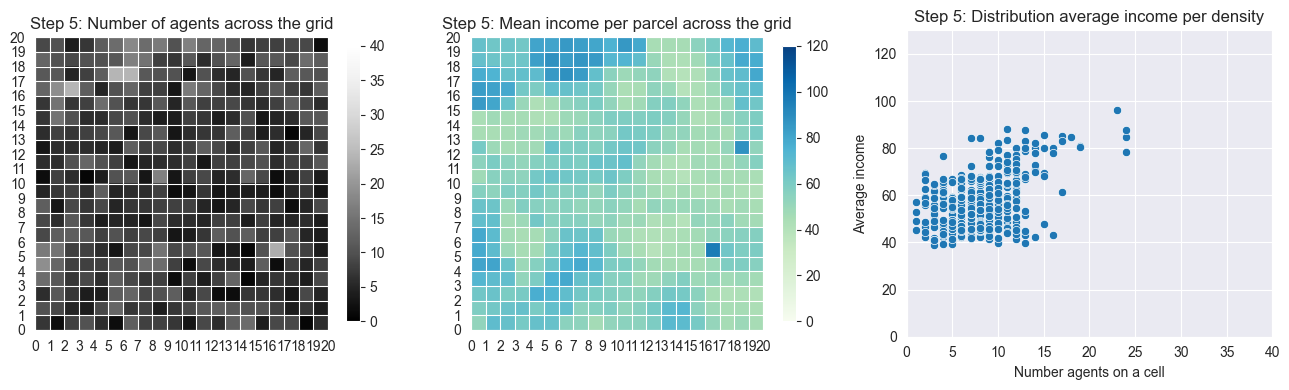

6


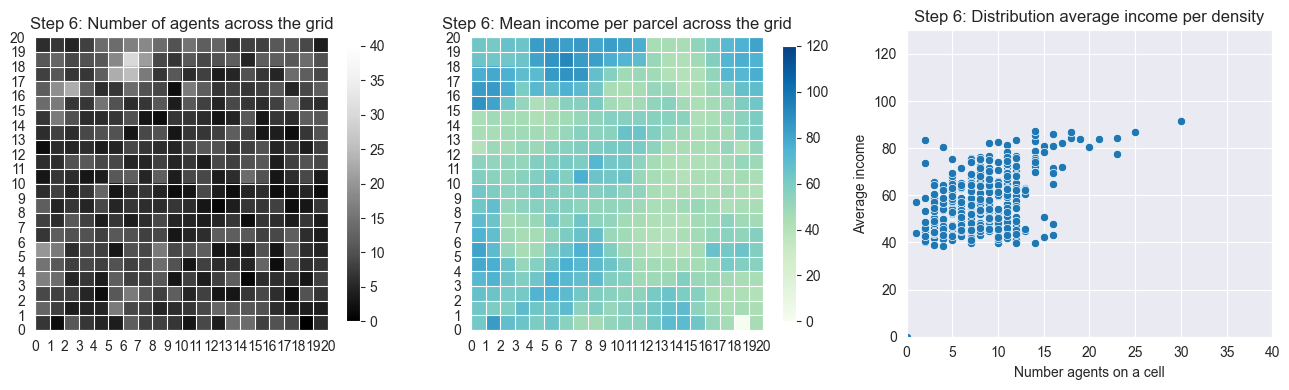

7


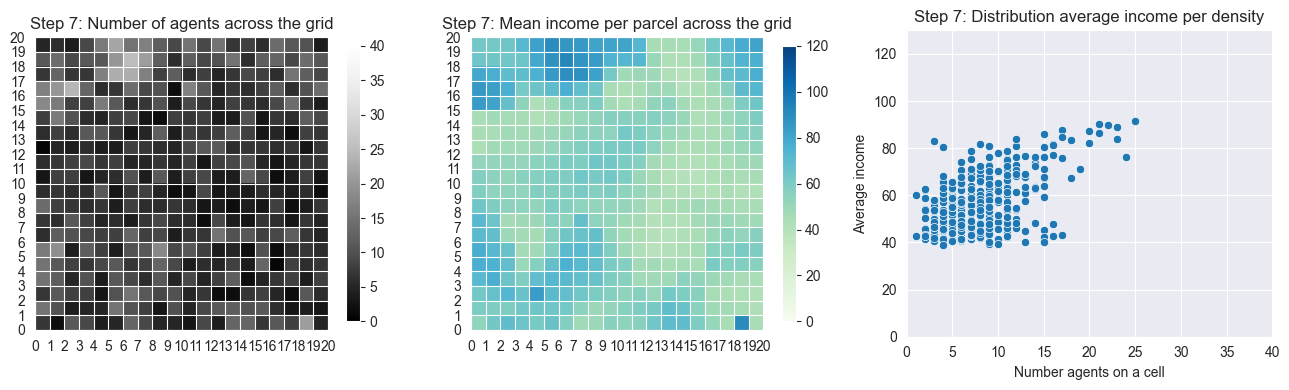

8


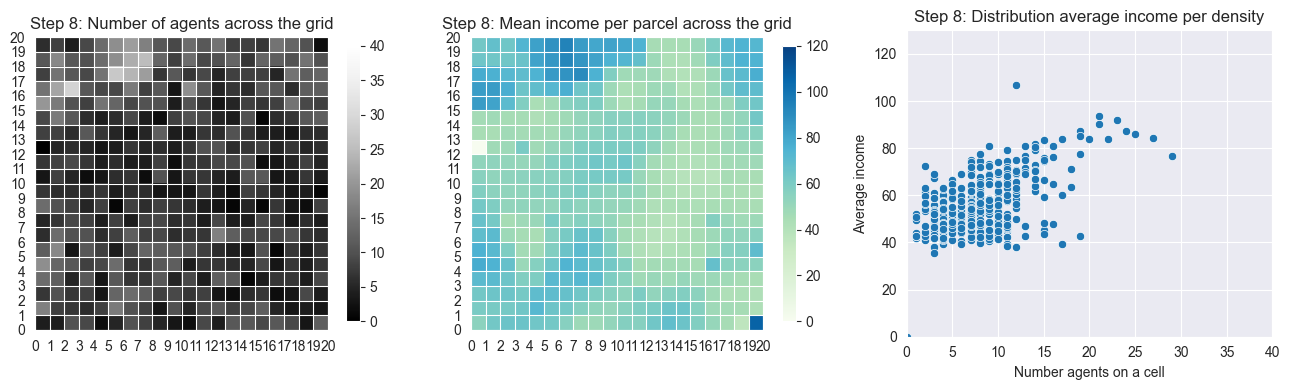

9


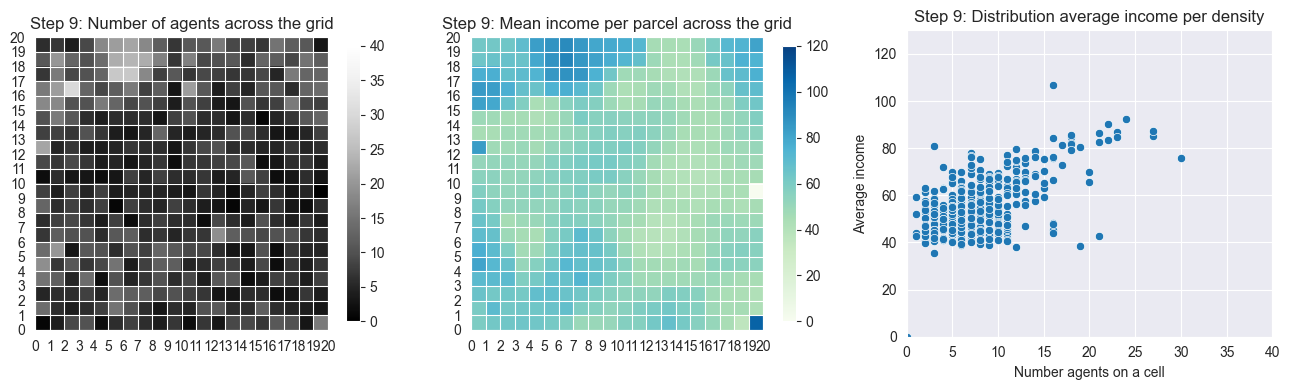

10


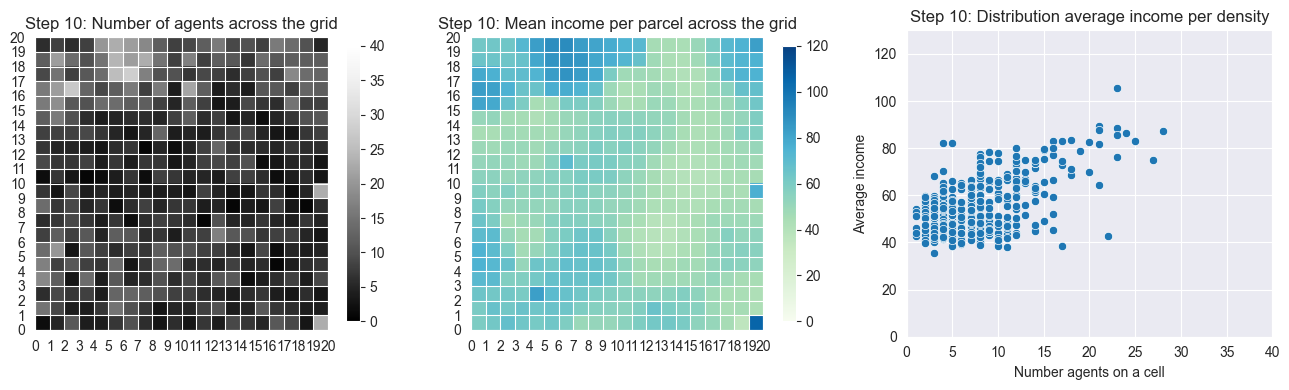

11


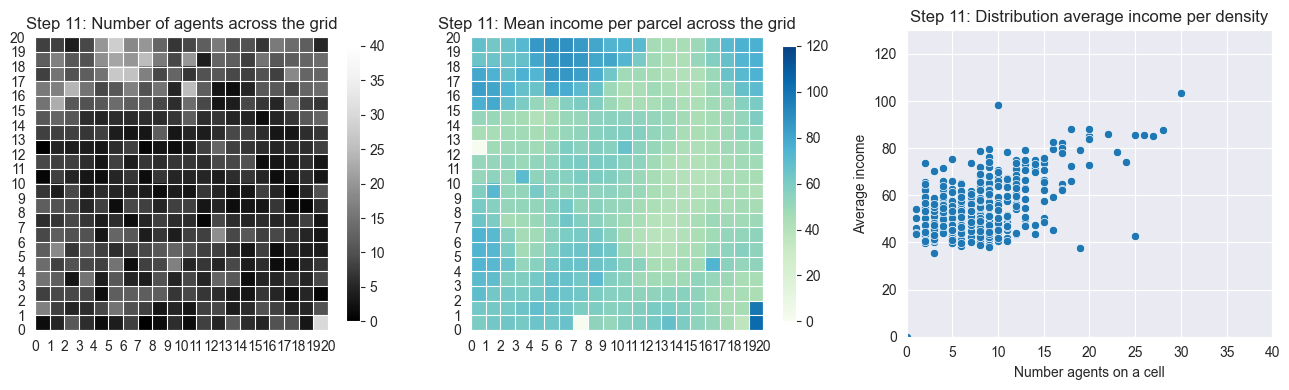

12


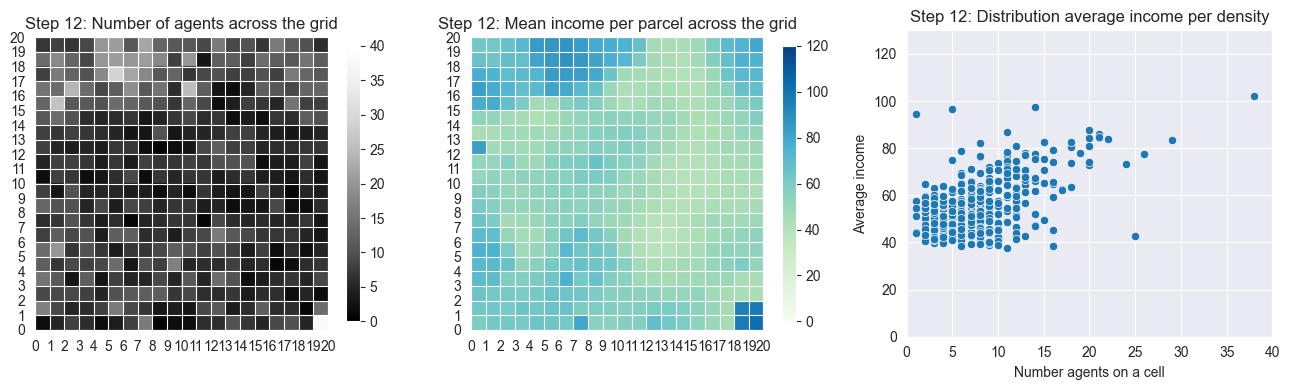

13


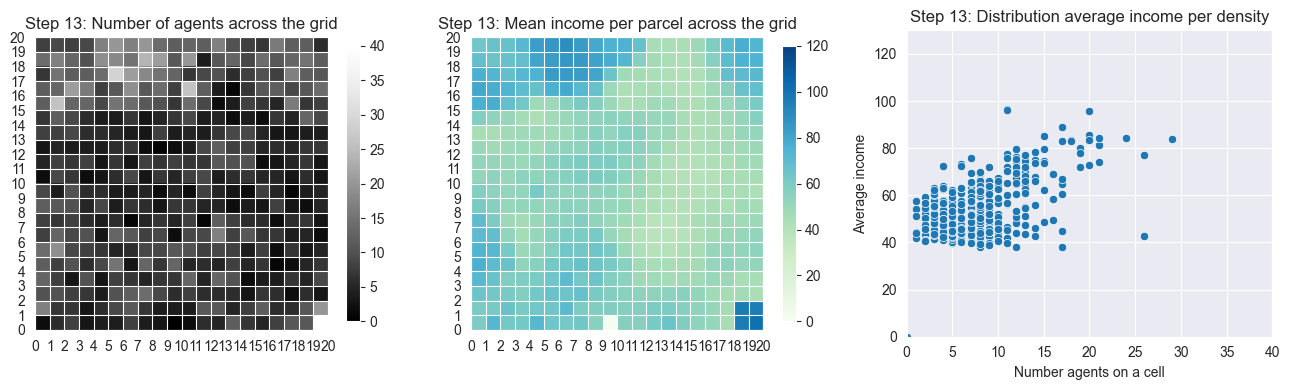

14


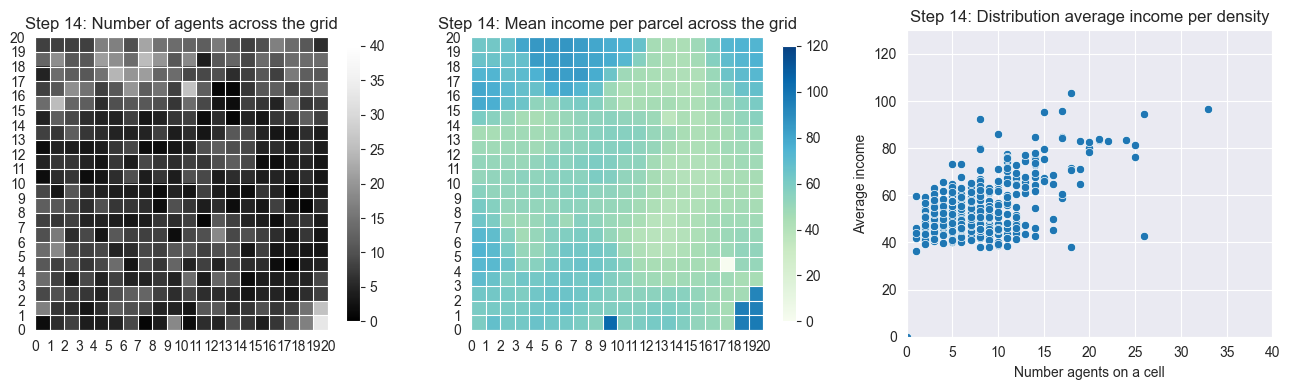

15


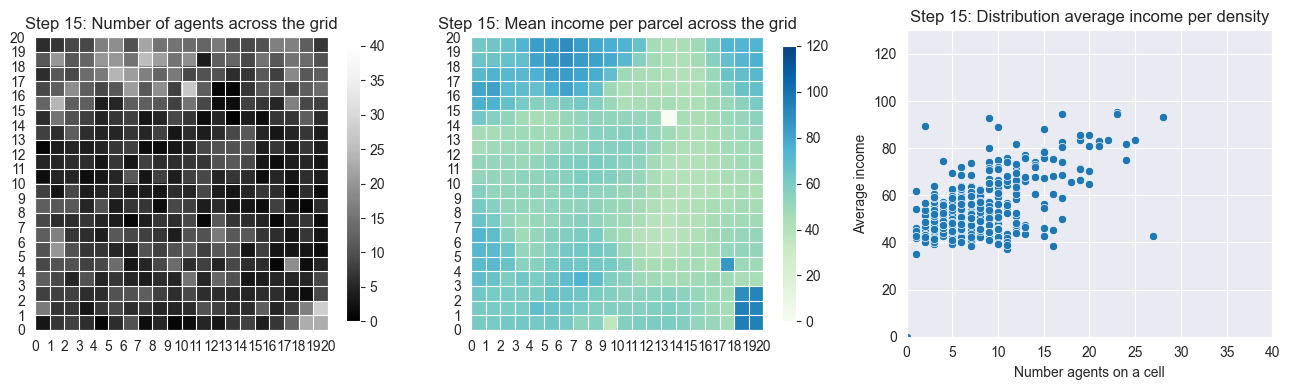

16


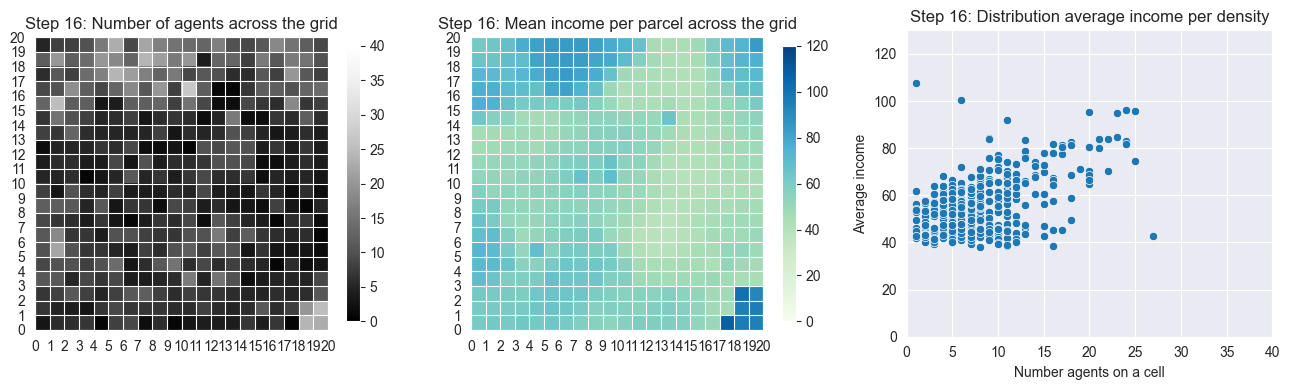

17


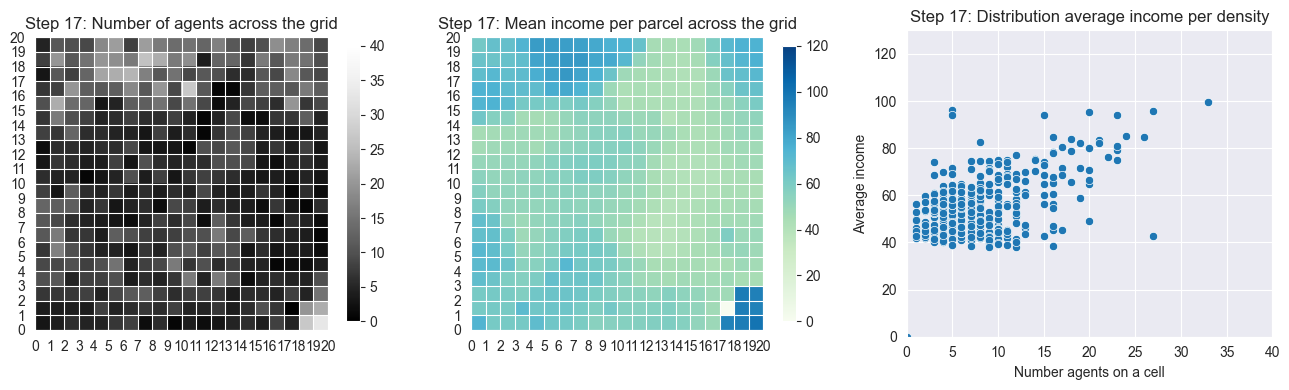

18


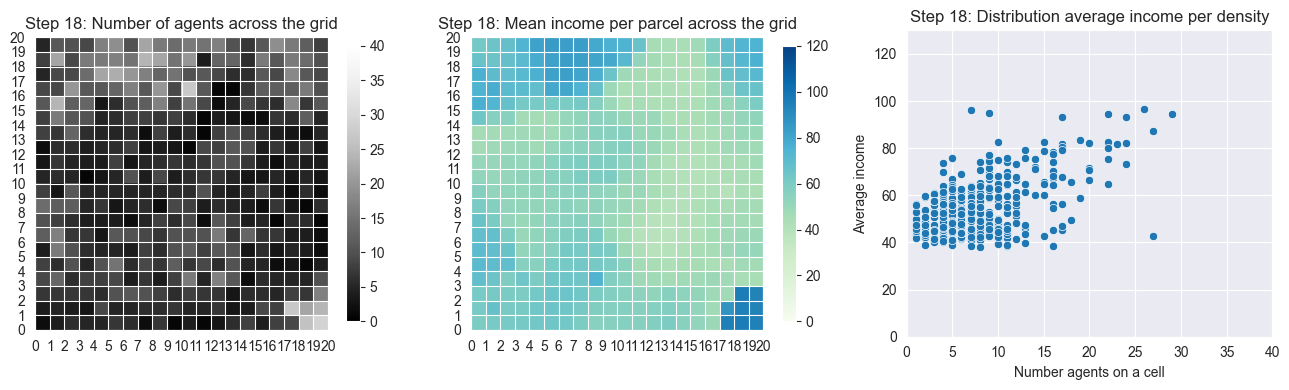

19


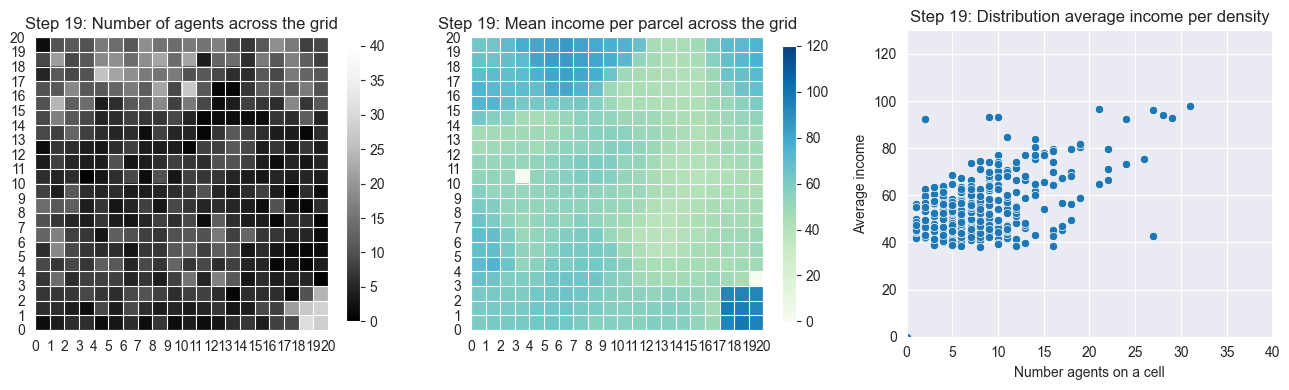

In [5]:
#Running the model for a certain amount of steps
while model.schedule.steps < 20:
    model.step()

### STD and max, min of cells and neighborhoods ###

Text(0.5, 1.0, 'Step 200: Distribution std income per average income of a cell')

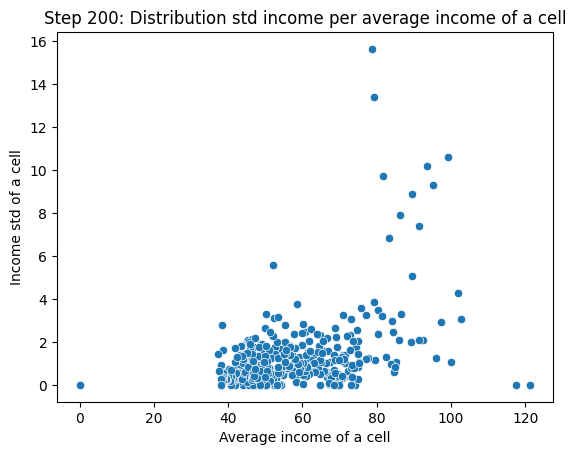

In [50]:
model_income = []
model_income_std = []

agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    list_income = []
    cell_content = cell[0]
    x = cell[1][0]
    y = cell[1][1]
    density = len(cell_content)
    if len(cell_content) != 0:  # If there are agents on the cell
        for agent in cell_content:
            list_income.append(agent.income)
        mean_income = mean(list_income)
        std_income = np.std(list_income)
    else:
        mean_income = 0
        std_income = 0
    model_income.append(mean_income)
    model_income_std.append(std_income)
    agent_counts[x][y] = std_income

sns.scatterplot(x=model_income, y=model_income_std)
plt.xlabel('Average income of a cell')
plt.ylabel('Income std of a cell')
plt.title(f'Step {model.schedule.steps}: Distribution std income per average income of a cell')

Text(0.5, 1.0, 'Step 200: Distribution std income per average income of a neighborhood')

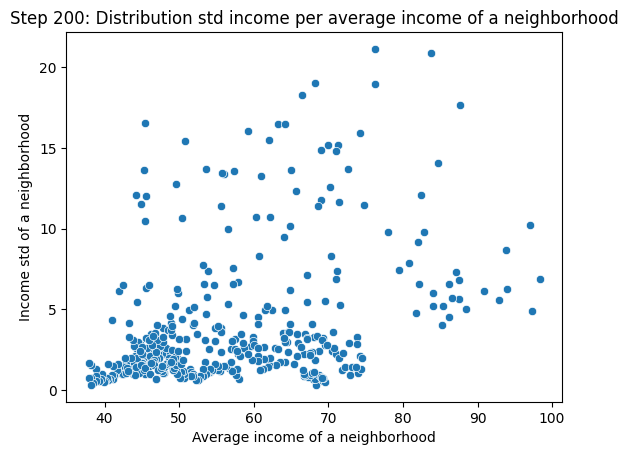

In [51]:
model_income_mean = []
model_income_std = []
for cell in model.grid.coord_iter():
    income_list =[]
    list_agents = cell[0]
    x = cell[1][0]
    y = cell[1][1]

    if model.grid.is_cell_empty((x, y)):
        parcel_value_mean = 0
        parcel_value_std = 0
    else:
        for agent in list_agents:
            income_list += [agent.income]

        for neighbor in model.grid.iter_neighbors(pos=(x,y),moore=True):
            income_list.append(neighbor.income)

        parcel_value_mean = mean(income_list)
        parcel_value_std = np.std(income_list)
        model_income_mean.append(parcel_value_mean)
        model_income_std.append(parcel_value_std)

sns.scatterplot(x=model_income_mean, y=model_income_std)
plt.xlabel('Average income of a neighborhood')
plt.ylabel('Income std of a neighborhood')
plt.title(f'Step {model.schedule.steps}: Distribution std income per average income of a neighborhood')

Text(0.5, 1.0, 'Step 200: Distribution max,min income per average income of a neighborhood')

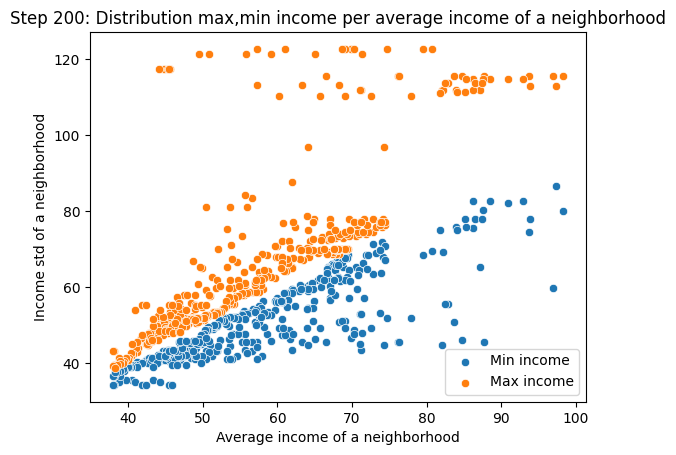

In [52]:
model_income_mean = []
model_income_min = []
model_income_max = []
for cell in model.grid.coord_iter():
    income_list = []
    list_agents = cell[0]
    x = cell[1][0]
    y = cell[1][1]

    if model.grid.is_cell_empty((x, y)):
        parcel_value_mean = 0
        parcel_value_std = 0
    else:
        for agent in list_agents:
            income_list += [agent.income]

        for neighbor in model.grid.iter_neighbors(pos=(x, y), moore=True):
            income_list.append(neighbor.income)

        parcel_value_mean = mean(income_list)
        parcel_value_std = np.min(income_list)
        parcel_value_max = np.max(income_list)
        model_income_mean.append(parcel_value_mean)
        model_income_min.append(parcel_value_std)
        model_income_max.append(parcel_value_max)

sns.scatterplot(x=model_income_mean, y=model_income_min, label='Min income')
sns.scatterplot(x=model_income_mean, y=model_income_max, label='Max income')
plt.xlabel('Average income of a neighborhood')
plt.ylabel('Income std of a neighborhood')
plt.title(f'Step {model.schedule.steps}: Distribution max,min income per average income of a neighborhood')

## Transform plots into a video ##

In [2]:
import imageio
import os

image_folder = '../Model4/modelrun_images'  # Replace this with your image folder path
video_name = 'output_video.mp4'  # Output video file name
output_folder = '../Model4'

images = []
file_names = sorted([os.path.join(image_folder, fn) for fn in os.listdir(image_folder) if fn.endswith('.png')])

for file_name in file_names:
    images.append(imageio.imread(file_name))

# Save the images as a video
video_path = os.path.join(output_folder, video_name)
imageio.mimsave(video_path, images, fps=1)

print(f"Video created: {video_path}")

C:\Users\anned\AppData\Local\Temp\ipykernel_12624\3526723661.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_name))
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1300, 400) to (1312, 400) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video created: ../Model4\output_video.mp4


### Used income distributions for the model ###

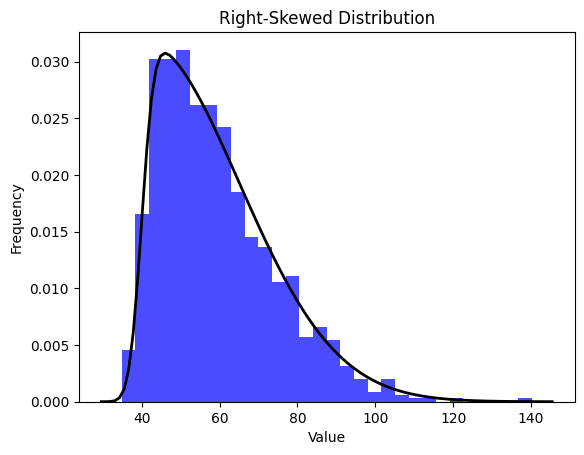

<Figure size 640x480 with 0 Axes>

In [4]:
# Set the seed for reproducibility
np.random.seed(42)

# Parameters for the skewed distribution
a = 10  # shape parameter (controls skewness)
loc = 40  # mean of the distribution
scale = 25  # standard deviation

# Generate random samples from a skewed distribution
data = skewnorm.rvs(a, loc=loc, scale=scale, size=1000)

# Plot the histogram
plt.hist(data, bins=30, density=True, alpha=0.7, color='blue')

# Plot the probability density function (PDF) of the skewed distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = skewnorm.pdf(x, a, loc=loc, scale=scale)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Right-Skewed Distribution')
plt.show()

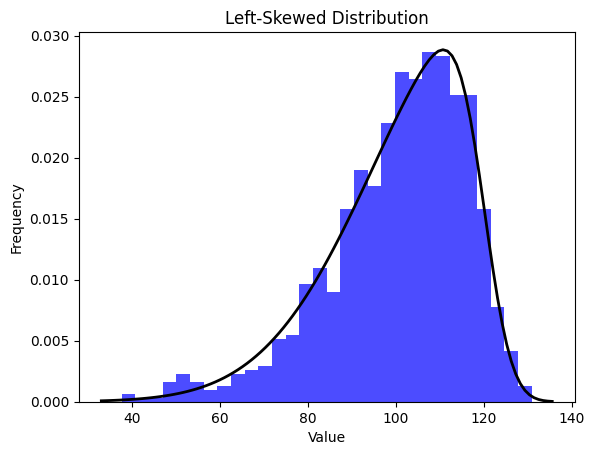

In [13]:
# Parameters for the left-skewed distribution
a_left_skewed = -5  # shape parameter (controls skewness)
mean = 120  # desired mean of the distribution
scale = 25  # standard deviation

# Calculate the location parameter based on the desired mean
loc_left_skewed = mean - scale * a_left_skewed / 2  # For a left-skewed distribution

# Generate random samples from the left-skewed distribution
data_left_skewed = skewnorm.rvs(a_left_skewed, loc=mean, scale=scale, size=1000)

# Plot the histogram of the left-skewed distribution
plt.hist(data_left_skewed, bins=30, density=True, alpha=0.7, color='blue', label='Histogram')

# Plot the probability density function (PDF) of the left-skewed distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = skewnorm.pdf(x, a_left_skewed, loc=mean, scale=scale)
plt.plot(x, p, 'k', linewidth=2, label='PDF')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Left-Skewed Distribution')

plt.savefig('../Model4/test.png')

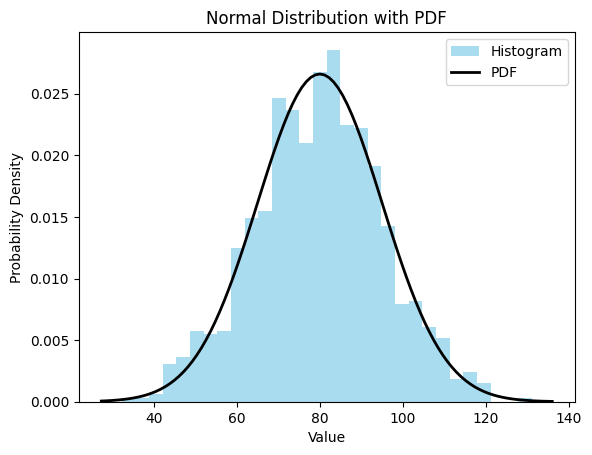

In [8]:
# Generate random data following a normal distribution
mean = 80  # Mean of the distribution
std_dev = 15  # Standard deviation of the distribution
num_samples = 1000  # Number of samples

# Generate random samples from a normal distribution
data = np.random.normal(mean, std_dev, num_samples)

# Create a histogram to visualize the distribution
plt.hist(data, bins=30, density=True, alpha=0.7, color='skyblue', label='Histogram')

# Plot the probability density function (PDF) of the normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std_dev**2))
plt.plot(x, p, 'k', linewidth=2, label='PDF')

# Add labels, title, and legend
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Normal Distribution with PDF')
plt.legend()

# Show the plot
plt.show()

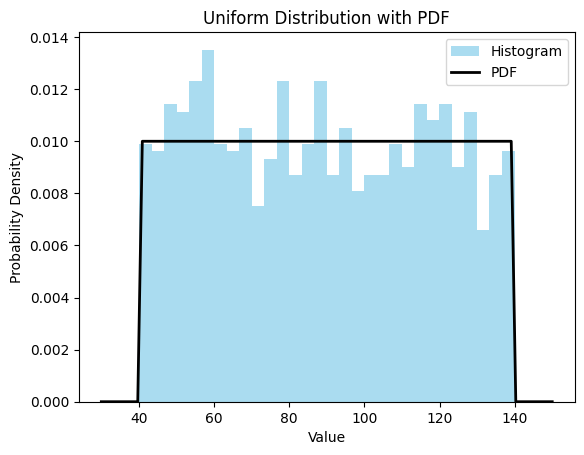

In [12]:
# Parameters for the uniform distribution
lower_bound = 30  # Lower bound of the distribution
upper_bound = 130  # Upper bound of the distribution

# Generate random samples from a uniform distribution
num_samples = 1000  # Number of samples
data = uniform.rvs(loc=lower_bound, scale=upper_bound - lower_bound, size=num_samples)

# Create a histogram to visualize the distribution
plt.hist(data, bins=30, density=True, alpha=0.7, color='skyblue', label='Histogram')

# Plot the probability density function (PDF) of the uniform distribution
x = np.linspace(lower_bound - 10, upper_bound + 10, 100)
pdf = uniform.pdf(x, loc=lower_bound, scale=upper_bound - lower_bound)
plt.plot(x, pdf, 'k', linewidth=2, label='PDF')

# Add labels, title, and legend
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Uniform Distribution with PDF')
plt.legend()

# Show the plot
plt.show()